### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [150]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [151]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [152]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [153]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What is the most popular day to travel in Washington?**

In [230]:
# Get the weekdays from Start.Time

wash_1 <- wash
wash_1$weekday <- weekdays(as.Date(wash_1$Start.Time))
head(wash_1)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,weekday
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,Wednesday
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,Saturday
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,Tuesday
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,Sunday
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,Saturday
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,Sunday


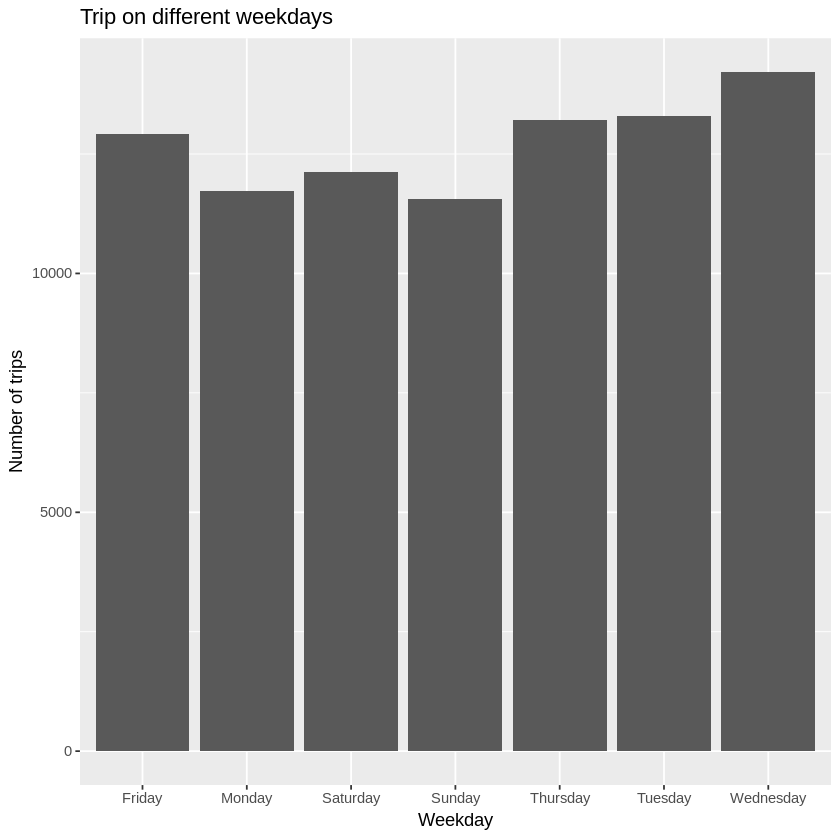

In [232]:
ggplot(aes(x = weekday), data = subset(wash_1, !is.na(weekday)))+
  geom_bar()+        
  ggtitle('Trip on different weekdays') +
  xlab('Weekday') +
  ylab('Number of trips')

In [234]:
library(plyr)
weekday_count <- count(wash_1, "weekday")
weekday_count

weekday,freq
Friday,12926
Monday,11721
Saturday,12133
Sunday,11566
Thursday,13204
Tuesday,13288
Wednesday,14212
NA,1


**Summary of your question 1 results goes here.**

Wednesday is the most popular day to travel in Washington with 14212 recorded trips, while Sunday is the least popular day with only 11566 trips. 

### Question 2

**What are the earliest, most recent, most common year of birth in New York and Chicago?**

Warning message:
“Removed 5218 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

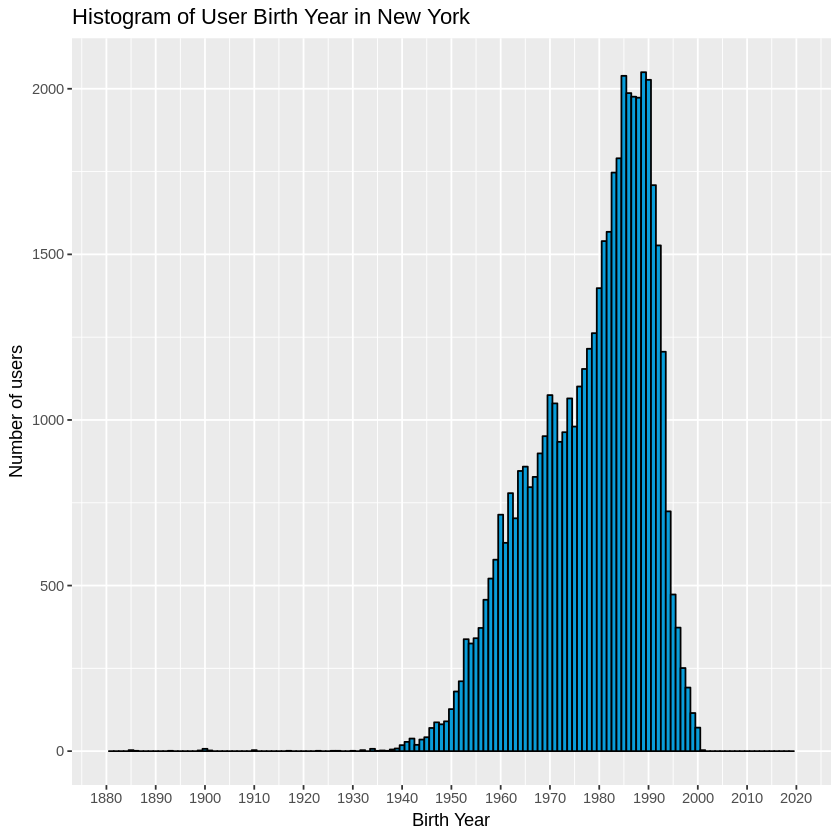

In [184]:
# Let's explore New York first.

library(ggplot2)
ggplot(aes(x = Birth.Year), data = ny)+
  geom_histogram(binwidth = 1, color = 'black', fill = '#099DD9')+
  scale_x_continuous(breaks = seq(1880, 2020, 10), limits = c(1880, 2020))+
  ggtitle('Histogram of User Birth Year in New York') +
  xlab('Birth Year') +
  ylab('Number of users')

Warning message:
“Removed 5218 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

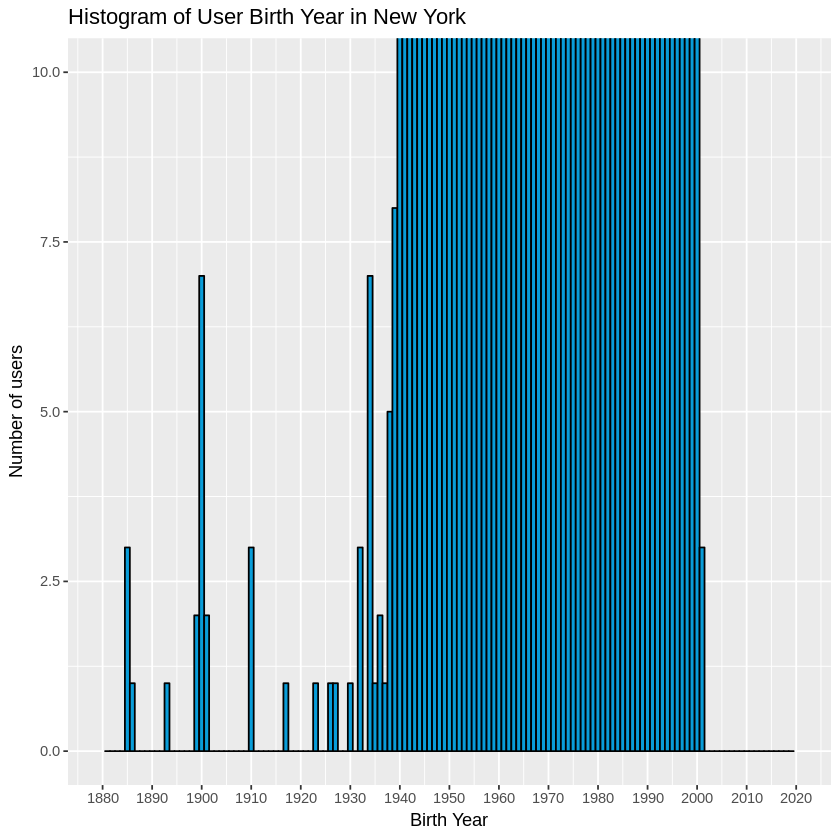

In [183]:
# Use coord_cartesian to zoom in

library(ggplot2)
ggplot(aes(x = Birth.Year), data = ny)+
  geom_histogram(binwidth = 1, color = 'black', fill = '#099DD9')+
  scale_x_continuous(breaks = seq(1880, 2020, 10), limits = c(1880, 2020))+
  coord_cartesian(ylim = c(0,10))+
  ggtitle('Histogram of User Birth Year in New York') +
  xlab('Birth Year') +
  ylab('Number of users')

Warning message:
“Removed 1747 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

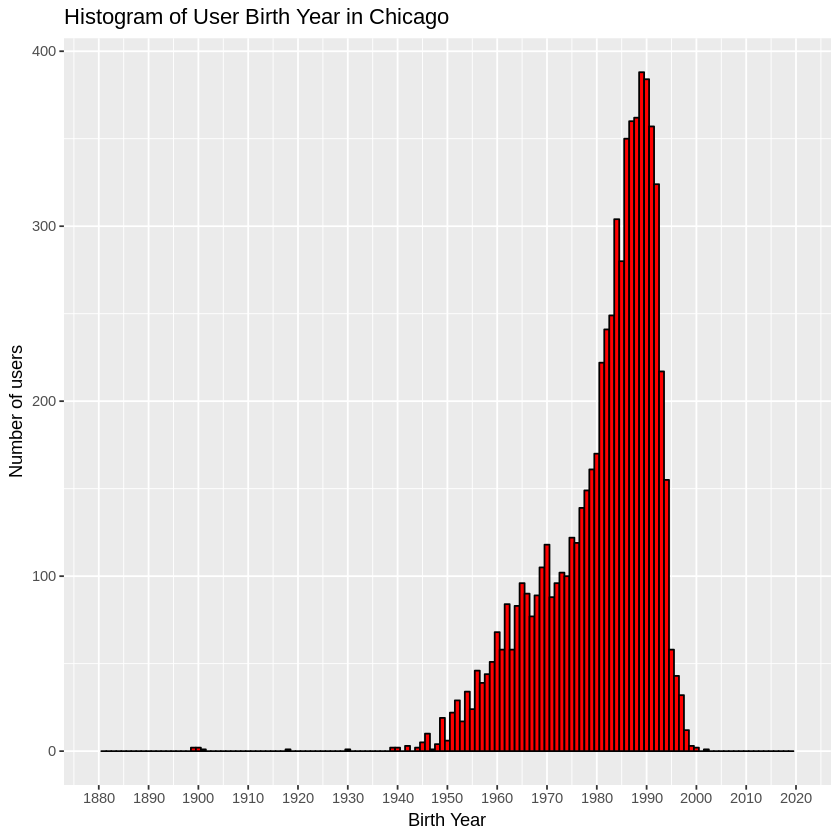

In [182]:
# Chicago

library(ggplot2)
ggplot(aes(x = Birth.Year), data = chi)+
  geom_histogram(binwidth = 1, color = 'black', fill = '#FF0000')+
  scale_x_continuous(breaks = seq(1880, 2020, 10), limits = c(1880, 2020))+
  ggtitle('Histogram of User Birth Year in Chicago') +
  xlab('Birth Year') +
  ylab('Number of users')

Warning message:
“Removed 1747 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

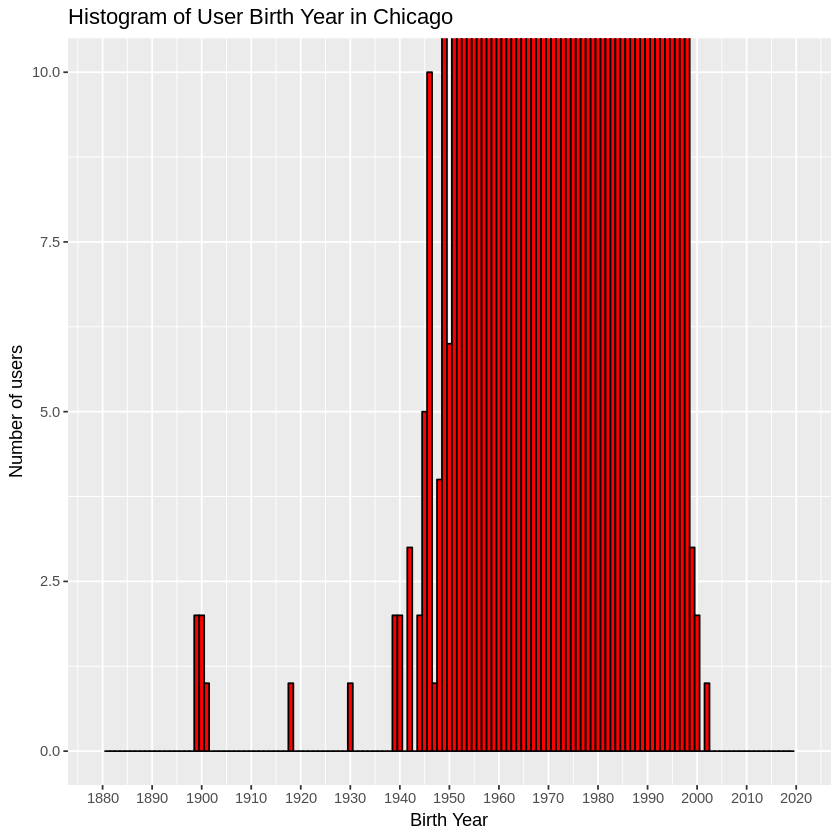

In [181]:
# Use coord_cartesian to zoom in

library(ggplot2)
ggplot(aes(x = Birth.Year), data = chi)+
  geom_histogram(binwidth = 1, color = 'black', fill = '#FF0000')+
  scale_x_continuous(breaks = seq(1880, 2020, 10), limits = c(1880, 2020))+
  coord_cartesian(ylim = c(0,10))+
  ggtitle('Histogram of User Birth Year in Chicago') +
  xlab('Birth Year') +
  ylab('Number of users')

We can remove the NAs in Birth.Year and get the summaries for Birth.Year from both data sets

In [162]:
NY_omit <- na.omit(ny$Birth.Year)

In [163]:
Chi_omit <- na.omit(chi$Birth.Year)

In [164]:
summary(NY_omit)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1885    1970    1981    1978    1988    2001 

In [165]:
summary(Chi_omit)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1899    1975    1984    1981    1989    2002 

In [166]:
# define a function to get mode(the most common) of birth year

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [167]:
getmode(NY_omit)

[1] 1989

In [168]:
getmode(Chi_omit)

[1] 1989

**Summary of your question 2 results goes here.**

We can read from the plots and summaries/getmode that the earliest, most recent, most common year of birth in New York are 1885, 2001, and 1989, respectively. The earliest, most recent, most common year of birth in Chicago are 1899, 2002, and 1989, respectively. 

### Question 3

**What is the average trip duration of users at different ages in Chicago?**

Warning message:
“Removed 1747 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1747 rows containing missing values (geom_point).”

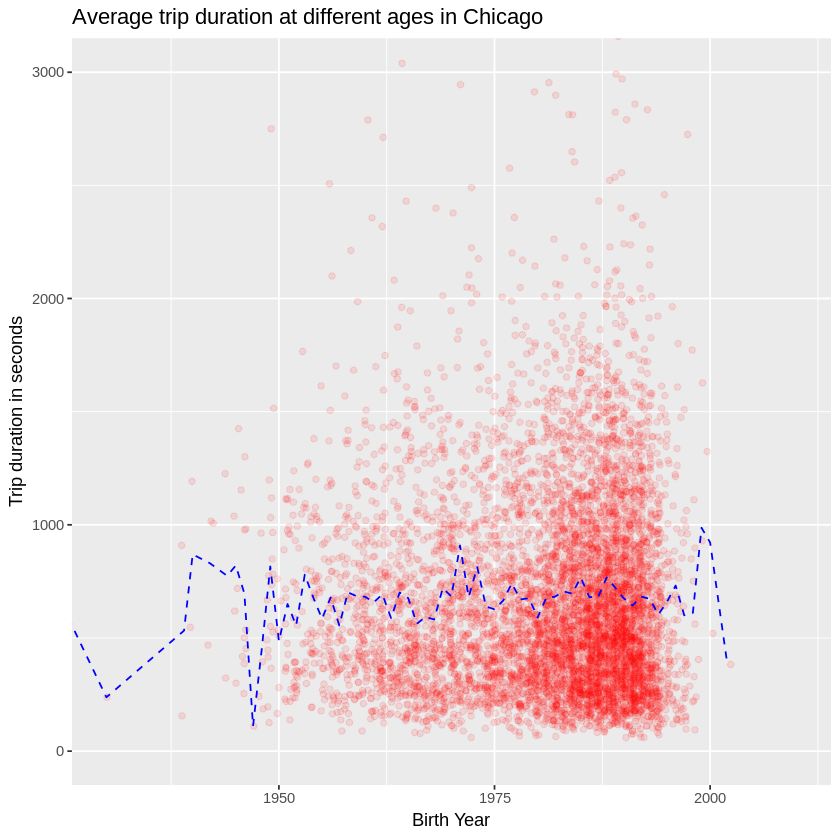

In [180]:
ggplot(aes(x = Birth.Year, y = Trip.Duration), data = chi) +
  coord_cartesian(xlim = c(1930, 2010), ylim = c(0,3000))+
  geom_point(alpha =1/10,
             position = position_jitter(h=0),
             color = 'red')+
  geom_line(stat = 'summary', fun.y = mean,
            linetype =2, color = 'blue')+
  ggtitle('Average trip duration at different ages in Chicago') +
  xlab('Birth Year') +
  ylab('Trip duration in seconds')

In [177]:
by(chi$Trip.Duration, chi$Birth.Year, summary)

chi$Birth.Year: 1899
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  196.0   236.2   276.5   276.5   316.8   357.0 
------------------------------------------------------------ 
chi$Birth.Year: 1900
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  856.0   972.5  1089.0  1089.0  1205.5  1322.0 
------------------------------------------------------------ 
chi$Birth.Year: 1901
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    258     258     258     258     258     258 
------------------------------------------------------------ 
chi$Birth.Year: 1918
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1191    1191    1191    1191    1191    1191 
------------------------------------------------------------ 
chi$Birth.Year: 1930
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    238     238     238     238     238     238 
------------------------------------------------------------ 
chi$Birth.Year: 1939
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  156.0   344.2   532.5  

**Summary of your question 3 results goes here.**

We can see from the plot that the average trip duration is not strongly correlated with age. For most ages, the average duration is around 700 seconds. 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [235]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')